In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn import datasets
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [2]:
digits=datasets.load_digits()   
digits    #image are converted into numpy array

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [27]:
digits.feature_names


['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [3]:
digits.values()

dict_values([array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), array([0, 1, 2, ..., 8, 9, 8]), None, ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_

In [4]:
print(digits.images.shape) #total no. of image and 8*8 
print(digits.data.shape) #one dimentional is 64
print(digits.target.shape)

(1797, 8, 8)
(1797, 64)
(1797,)


In [5]:
#0=black
#255=white
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
for i in digits:
    print(i)

data
target
frame
feature_names
target_names
images
DESCR


In [7]:
df=pd.DataFrame({"traget":digits.target})
df

,traget
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


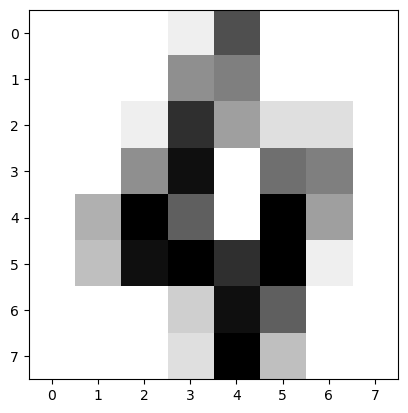

In [8]:
plt.imshow(digits.images[4],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

Digits dataset keys: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Number of samples: 1797
Number of features per sample: 64


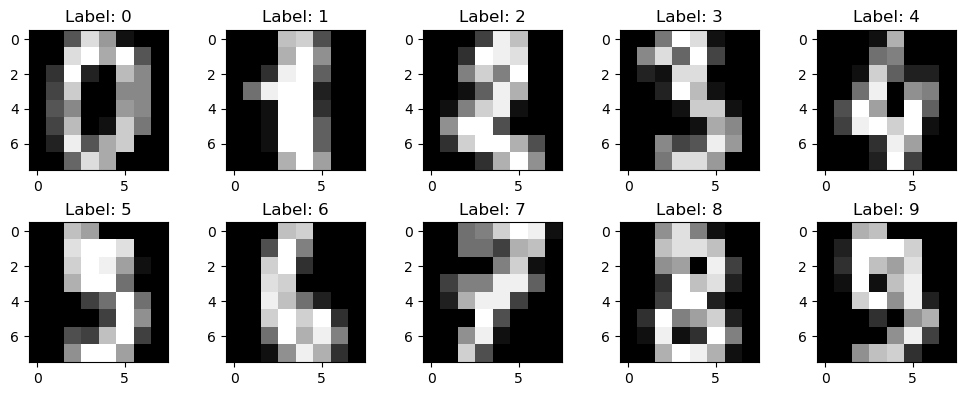

In [9]:
# Display dataset information
print("Digits dataset keys:", digits.keys())
print("Number of samples:", len(digits.data))
print("Number of features per sample:", len(digits.data[0]))

# Visualize a few digits
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")

plt.tight_layout()
plt.show()

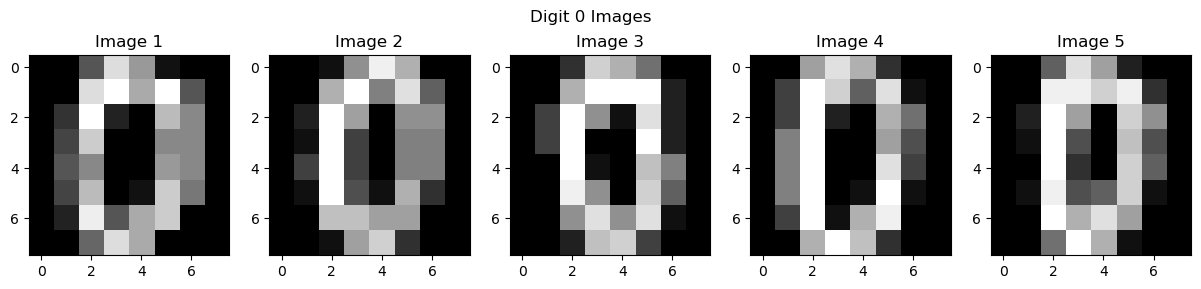

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets


# Choose the digit class (0 in this case)
digit_class = 0

# Select data for the chosen digit class
digit_data = digits.data[digits.target == digit_class]

# Plot a sample of digit images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    axes[i].imshow(digit_data[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f"Image {i+1}")

plt.suptitle(f'Digit {digit_class} Images')
plt.show()


In [11]:
import numpy as np
from scipy.stats import zscore
from sklearn import datasets

# Choose the digit class (0 in this case)
digit_class = 0

# Select data for the chosen digit class
digit_data = digits.data[digits.target == digit_class]

# Calculate Z-scores for each feature
z_scores = zscore(digit_data)

# Define a threshold for outliers (e.g., Z-score greater than 3 or less than -3)
threshold = 3

# Identify outliers
outliers = np.abs(z_scores) > threshold

# Print the indices of outliers
outlier_indices = np.where(outliers)
print("Indices of Outliers:", outlier_indices)


Indices of Outliers: (array([  7,   8,   8,   9,  19,  20,  22,  23,  26,  29,  29,  29,  30,
        30,  30,  30,  49,  50,  54,  59,  60,  60,  62,  63,  72,  72,
        72,  78,  80,  80,  83,  83,  84,  84,  85,  87,  90,  97, 103,
       106, 106, 106, 107, 107, 107, 107, 107, 107, 110, 111, 112, 115,
       117, 117, 118, 118, 118, 119, 119, 119, 121, 122, 122, 122, 123,
       123, 125, 126, 126, 126, 126, 131, 137, 139, 139, 156, 156, 156,
       158, 158, 158, 159, 159, 159, 160, 161, 161, 167, 170, 171, 172,
       172, 177], dtype=int64), array([43,  9, 28, 62, 43, 43, 44, 28, 14,  6, 14, 21,  5,  6, 14, 21, 54,
       28, 28,  6, 20, 28, 28, 11, 43, 44, 50, 21, 14, 21, 20, 49,  6, 14,
       49, 36, 10, 21, 54, 10, 18, 62,  1,  9, 17, 18, 54, 62, 62, 54, 18,
       60, 53, 60,  5,  6, 14,  1,  9, 17, 53,  3,  5, 53, 53, 60,  4, 42,
       53, 57, 60, 27, 28, 27, 35, 35, 36, 44, 27, 35, 43, 11, 18, 27, 35,
       35, 59,  4, 49,  4, 43, 44,  6], dtype=int64))


In [12]:
x=digits.data
y=digits.target
print(x)
print(y)
y.shape

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


(1797,)

In [13]:
#split into training and test set
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [14]:
# Create a k-NN classifier with 9 neighbors
knn = KNeighborsClassifier(n_neighbors=1)

# Perform 5-fold cross-validation
scores = cross_val_score(knn, x, y, cv=10)

# Calculate the average accuracy from cross-validation
average_accuracy = scores.mean()

print("Average Accuracy:", average_accuracy)

# Assuming you have already defined X_train, X_test, y_train, and y_test
knn.fit(X_train, y_train)

# Calculate the accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

print("Test Accuracy:", test_accuracy)

Average Accuracy: 0.9749627560521414
Test Accuracy: 0.9861111111111112


In [28]:
import joblib

# Save the pipeline to a file
joblib.dump(knn, 'kNN_model.pkl')

['kNN_model.pkl']

In [15]:
train_accuracy = []
test_accuracy = []
test_accuracy_dict = {}

for i in range(1, 11):  # Changed the range from (0, 10) to (1, 11) to avoid division by zero
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_acc = knn.score(X_test, y_test)
    test_accuracy.append(test_acc)
    test_accuracy_dict[i] = test_acc

# Find the K value with the highest accuracy
best_k = max(test_accuracy_dict, key=test_accuracy_dict.get)
best_accuracy = test_accuracy_dict[best_k]

print("Train Accuracy for different K values:")
print(train_accuracy)

print("\nTest Accuracy for different K values:")
print(test_accuracy)

print("\nTest Accuracy Dictionary:")
print(test_accuracy_dict)

print("\nBest K value:", best_k)
print("Best Accuracy:", best_accuracy)


Train Accuracy for different K values:
[1.0, 0.9916492693110647, 0.9937369519832986, 0.9937369519832986, 0.9916492693110647, 0.9895615866388309, 0.9902574808629089, 0.9895615866388309, 0.9874739039665971, 0.9860821155184412]

Test Accuracy for different K values:
[0.9861111111111112, 0.9861111111111112, 0.9861111111111112, 0.9833333333333333, 0.9833333333333333, 0.9805555555555555, 0.9833333333333333, 0.9777777777777777, 0.9805555555555555, 0.9777777777777777]

Test Accuracy Dictionary:
{1: 0.9861111111111112, 2: 0.9861111111111112, 3: 0.9861111111111112, 4: 0.9833333333333333, 5: 0.9833333333333333, 6: 0.9805555555555555, 7: 0.9833333333333333, 8: 0.9777777777777777, 9: 0.9805555555555555, 10: 0.9777777777777777}

Best K value: 1
Best Accuracy: 0.9861111111111112


In [16]:
for i in range(len(train_accuracy)):
    print(i,train_accuracy[i]-test_accuracy[i])

0 0.01388888888888884
1 0.0055381581999535134
2 0.007625840872187428
3 0.010403618649965307
4 0.008315935977731392
5 0.009006031083275357
6 0.006924147529575597
7 0.011783808861053124
8 0.006918348411041553
9 0.008304337740663414


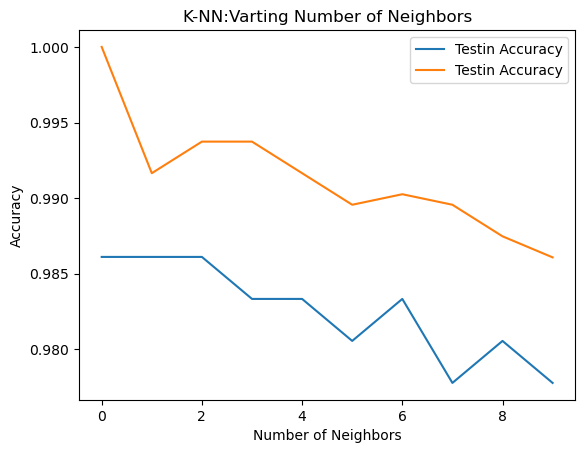

In [17]:
#generate plot
plt.title("K-NN:Varting Number of Neighbors")
neighbors=[i for i in range(0,10)]
plt.plot(neighbors,test_accuracy,label="Testin Accuracy")
plt.plot(neighbors,train_accuracy,label="Testin Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()


In [18]:
from sklearn.metrics import classification_report,confusion_matrix
len(knn.predict(X_train))
print(classification_report(y_test,knn.predict(X_test)))
print(confusion_matrix(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      1.00      0.95        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.86      0.90        35
           9       1.00      0.94      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0

Text(0.5, 1.0, 'Accuracy Score: 0.9777777777777777')

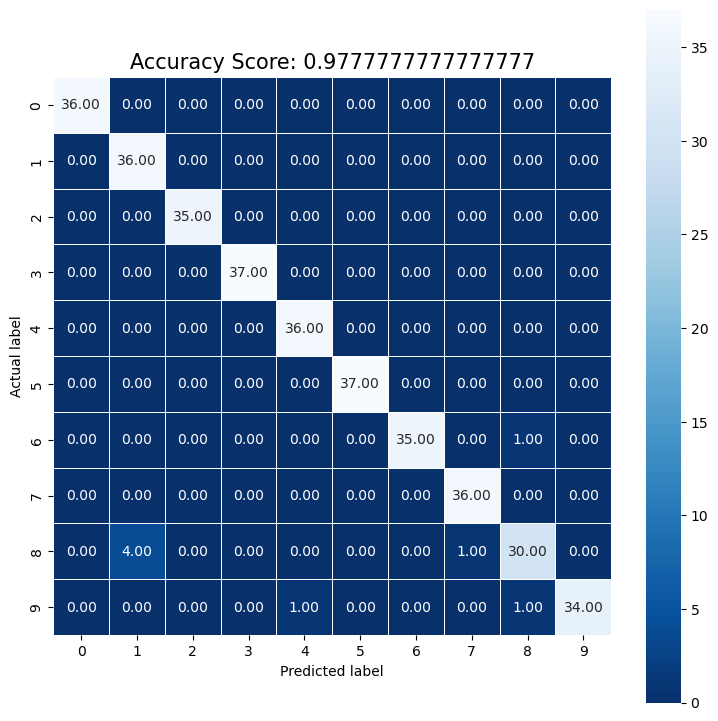

In [19]:
cm = confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.2f', linewidths=.7, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,knn.predict(X_test)))
plt.title(all_sample_title,size=15)

In [20]:
print("Predicted:", knn.predict(X_test))
print('Actual:', y_test)

Predicted: [5 2 8 1 7 2 6 2 6 5 0 5 9 3 4 4 2 4 9 9 6 3 8 1 2 5 6 0 3 4 6 7 2 6 6 6 8
 5 0 9 1 7 9 6 5 7 5 2 7 5 0 1 5 5 3 2 4 0 0 2 7 5 6 1 3 7 6 5 7 0 9 0 3 8
 2 5 7 2 3 5 9 3 2 7 9 6 1 1 0 1 2 9 4 4 1 2 7 8 4 2 6 8 3 7 3 9 6 1 1 0 9
 2 1 6 3 4 8 7 1 0 0 4 6 5 8 2 8 1 3 0 0 8 6 4 3 9 3 3 3 3 0 7 0 0 1 9 5 8
 1 5 0 6 6 6 6 1 7 7 6 7 7 8 7 3 6 5 9 0 3 8 0 9 8 1 9 5 9 5 8 9 9 7 9 1 9
 5 4 7 3 0 4 9 7 7 5 6 5 8 3 4 5 4 9 2 5 5 2 1 3 8 8 9 3 6 1 0 1 4 0 5 5 6
 6 7 4 3 8 4 1 0 7 9 2 1 4 8 4 2 4 0 0 0 2 6 7 0 4 5 2 2 9 0 4 6 8 2 3 9 2
 3 0 6 8 7 1 4 4 1 1 6 3 8 1 2 5 7 8 3 2 0 3 4 1 9 9 9 6 3 7 1 6 9 4 7 1 8
 1 3 0 5 3 4 1 9 3 5 4 7 4 1 5 1 5 0 9 8 4 2 3 8 4 1 2 0 1 1 4 4 5 7 5 0 3
 2 2 4 2 7 7 8 7 6 3 1 1 5 8 8 8 6 7 2 7 8 9 4 2 0 3 4]
Actual: [5 2 8 1 7 2 6 2 6 5 0 5 9 3 4 4 2 4 9 9 6 3 8 1 2 5 6 0 3 4 6 7 2 6 6 6 6
 5 0 9 1 7 9 6 5 7 5 2 7 5 0 8 5 5 3 2 4 0 0 2 7 5 6 1 3 7 6 5 7 0 9 0 3 8
 2 5 8 2 3 5 9 3 2 7 9 6 8 1 0 1 2 9 4 9 1 2 7 8 4 2 6 9 3 7 3 9 6 1 1 0 9
 2 1 6 3 4 8 7 1 0 0 4 6 

In [21]:
# # #Visulaizing the trianing set result  
# from matplotlib.colors import ListedColormap  
# x_set, y_set = X_train, y_train  
# x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
# np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
# plt.contourf(x1, x2, knn.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
# alpha = 0.75, cmap = ListedColormap(('red','green' )))  
# plt.xlim(x1.min(), x1.max())  
# plt.ylim(x2.min(), x2.max())  
# for i, j in enumerate(nm.unique(y_set)):  
#     mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
#         c = ListedColormap(('red', 'green'))(i), label = j)  
# plt.title('K-NN Algorithm (Training set)')  
# plt.xlabel('Age')  
# plt.ylabel('Estimated Salary')  
# plt.legend()  
# plt.show()  

C:\Users\asmit\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


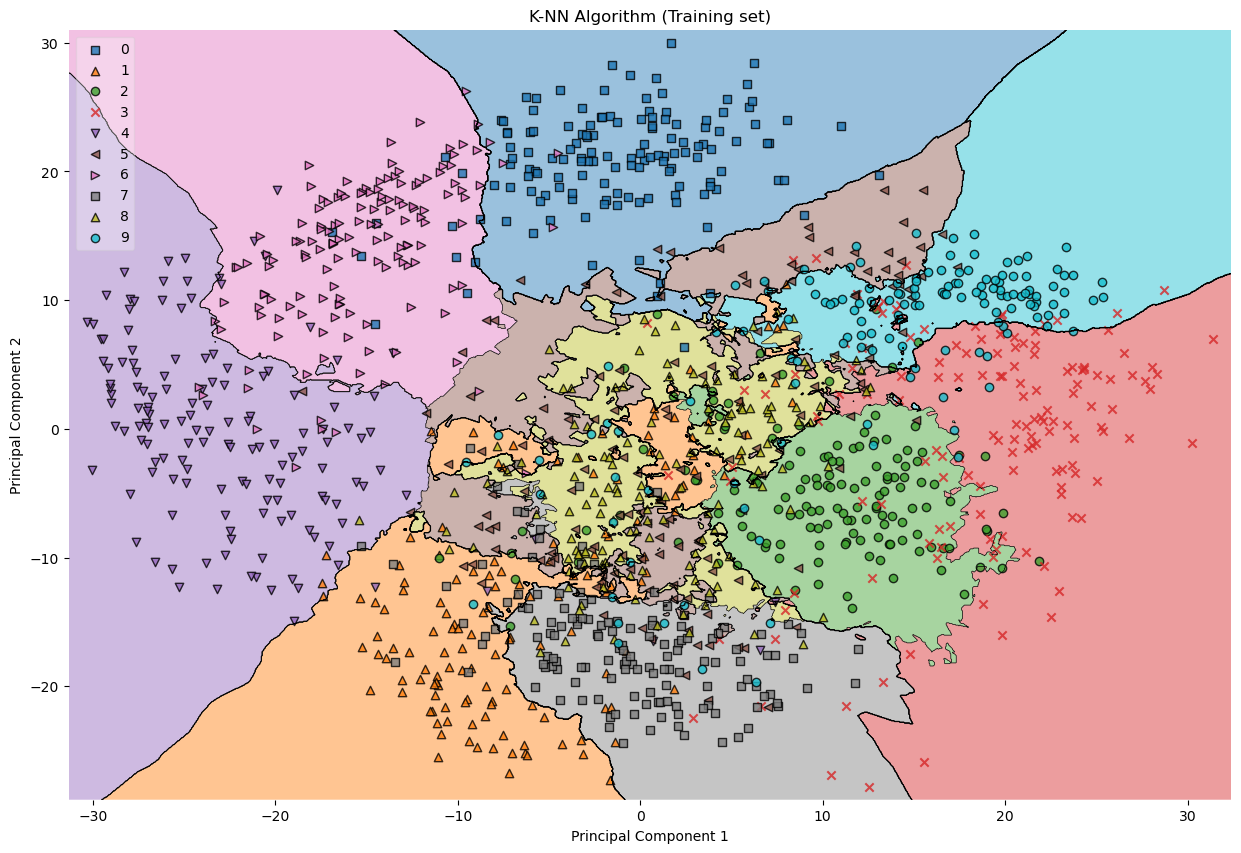

C:\Users\asmit\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


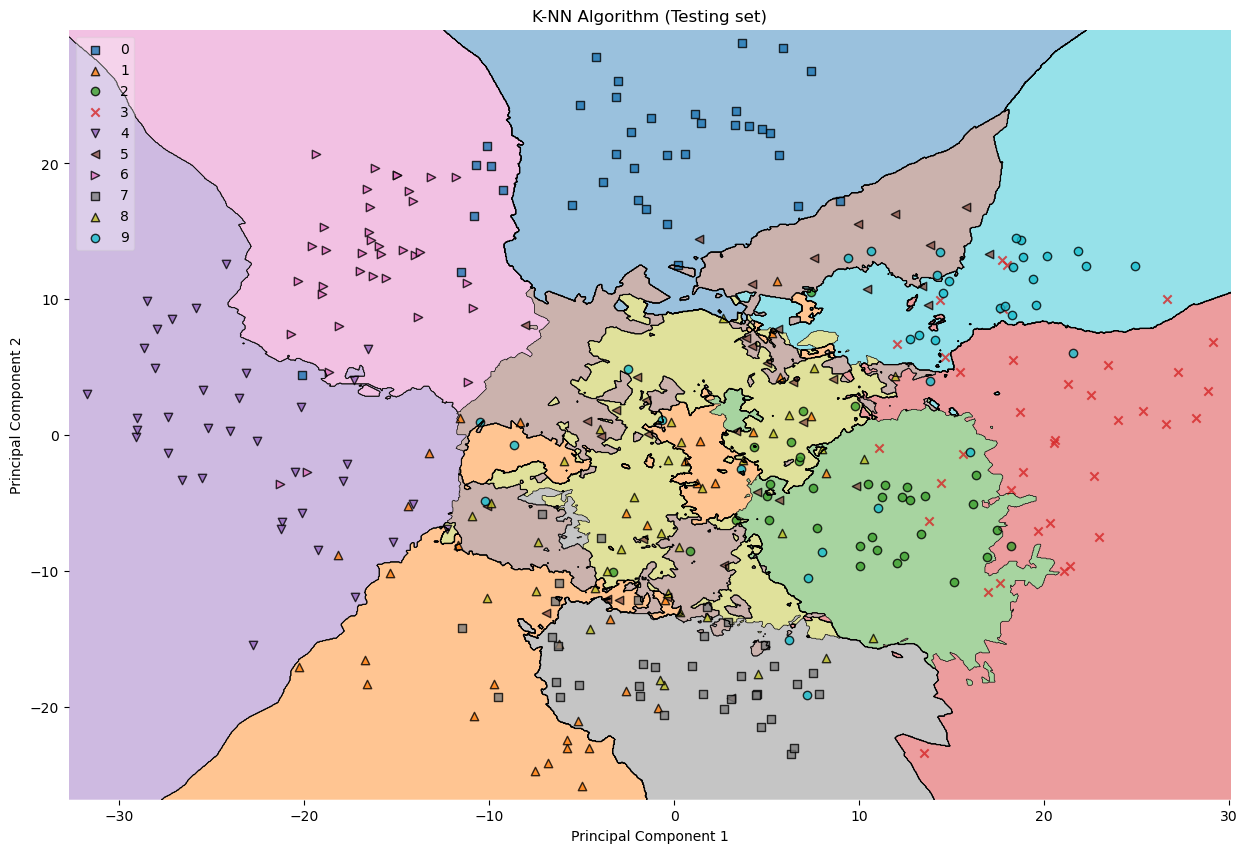

In [22]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# Assuming X_train and X_test have more than 2 features
# Apply PCA to reduce dimensionality to 2D for both training and testing sets
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create the KNN classifier with the desired number of neighbors
knn = KNeighborsClassifier(n_neighbors=15)

# Fit the KNN classifier to the training data
knn.fit(X_train_pca, y_train)

# Plot decision regions using PCA-transformed coordinates for training set
plt.figure(figsize=(15, 10))
plot_decision_regions(X_train_pca, y_train, clf=knn, legend=2)

# Set plot title, x-axis, y-axis labels, and show the legend
plt.title('K-NN Algorithm (Training set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot decision regions using PCA-transformed coordinates for testing set
plt.figure(figsize=(15, 10))
plot_decision_regions(X_test_pca, y_test, clf=knn, legend=2)

# Set plot title, x-axis, y-axis labels, and show the legend
plt.title('K-NN Algorithm (Testing set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [23]:

# from sklearn.manifold import TSNE

# # Apply t-SNE to reduce dimensionality to 2D
# tsne = TSNE(n_components=2, random_state=42)
# digits_tsne = tsne.fit_transform(digits.data)

# # Plot decision regions using t-SNE coordinates
# plt.figure(figsize=(8, 6))
# plot_decision_regions(digits_tsne, digits.target, clf=knn, legend=2)

# plt.title('K-NN Algorithm (t-SNE visualization)')
# plt.xlabel('t-SNE Dimension 1')
# plt.ylabel('t-SNE Dimension 2')
# plt.show()